In [11]:
import json
from collections import defaultdict
import pandas as pd

# Load the JSON data
with open('abrassive_test.json', 'r') as file:
    data = json.load(file)

content = data['content']

In [3]:
df = pd.DataFrame(content)
df.sample(2)

,text,x0,top,x1,bottom
203,abrasives,135.857634,247.18002,178.669086,257.20002
54,United,388.354620,126.13842,417.267330,136.15842


In [4]:
df2 = df.copy()

In [5]:
df2 = df2[df2['x0'] > 50]
df2['x1'] = round(df2['x1'], 1)  # PARAMS

In [6]:
# Group by 'x1'
grouped = df2.groupby('x1')


# Filter and print groups with more than 3 items
for name, group in grouped:
    if len(group) > 2:  # PARAMS
        print(f"Group: {name}")
        print(group)
        df_test = group
        print()

Group: 86.3
    text         x0       top    x1    bottom
444   as  77.870121  668.0075  86.3  675.9875
462   as  77.870121  679.0175  86.3  686.9975
469   as  77.870121  690.0275  86.3  698.0075
476   as  77.870121  701.0375  86.3  709.0175

Group: 260.5
          text      x0        top     x1     bottom
259       2022  238.20  324.64752  260.5  334.66752
265          —  250.44  335.17650  260.5  345.19650
273     60,000  229.86  346.15650  260.5  356.17650
278     50,000  229.86  357.13650  260.5  367.15650
283     90,000  229.86  368.17650  260.5  378.19650
288     50,000  229.86  379.15650  260.5  389.17650
293    800,000  224.34  390.13650  260.5  400.15650
298     40,000  229.86  401.17650  260.5  411.19650
303     80,000  229.86  412.15650  260.5  422.17650
308     40,000  229.86  423.13650  260.5  433.15650
313     15,000  229.86  434.17650  260.5  444.19650
318          —  250.44  445.15650  260.5  455.17650
323          —  250.44  456.13650  260.5  466.15650
328          —  

In [7]:
pd.DataFrame(df_test['text'])

,text
262,2023
268,"40,000"
276,—
281,—
286,—
291,"40,000"
296,"450,000"
301,"20,000"
306,"35,000"
311,"5,000"


In [8]:
# Initialize lists to store the results
min_bottoms = []
max_tops = []
group_names = []

# Iterate over each group
for name, group in grouped:
    if len(group) > 3:
        # Calculate the min of 'bottom' and max of 'top' for the group
        min_bottom = group['bottom'].max()
        max_top = group['top'].min()

        # Append the results to the lists
        group_names.append(name)
        min_bottoms.append(min_bottom)
        max_tops.append(max_top)

# Create a new DataFrame with the results
result_df = pd.DataFrame({
    'x1': group_names,
    'min_bottom': min_bottoms,
    'max_top': max_tops
})

print(result_df)

      x1  min_bottom    max_top
0   86.3    709.0175  668.00750
1  260.5    499.1565  324.64752
2  337.5    477.1965  335.17650
3  337.6    499.1565  324.64752
4  449.5    499.1565  324.64752
5  521.5    499.1565  324.64752


In [9]:
# df[df['text'] == "2023"]

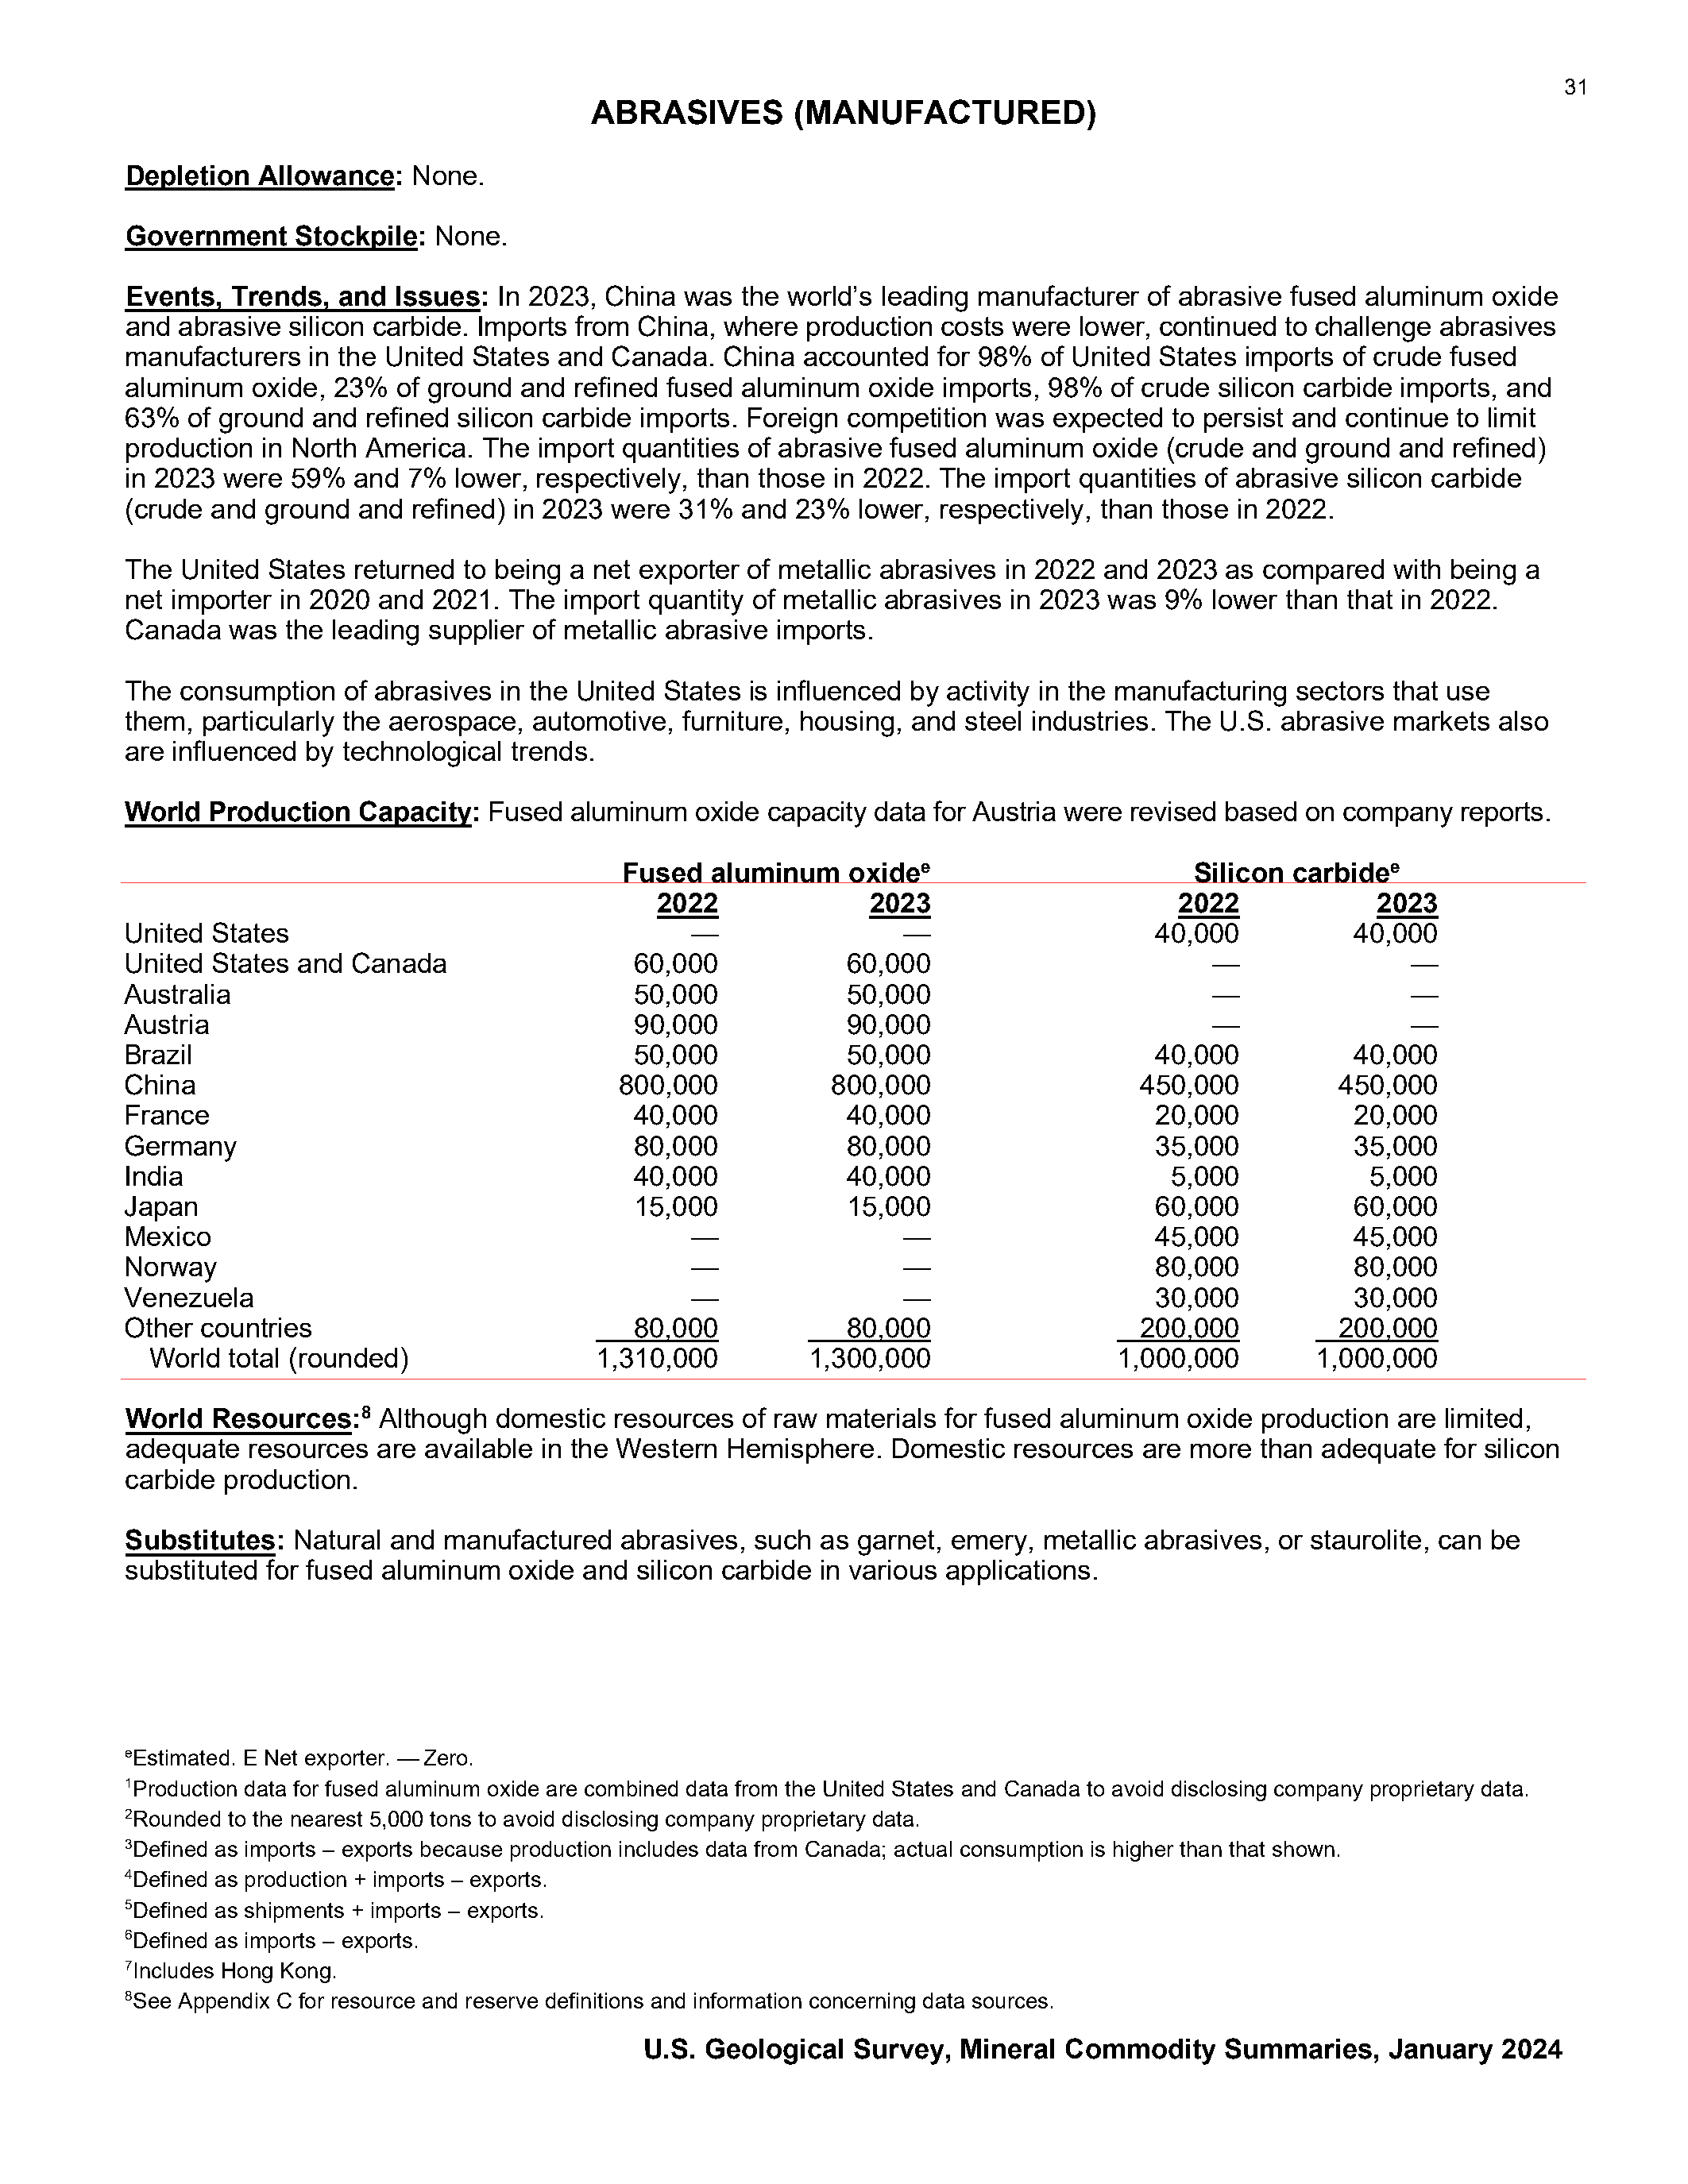

In [10]:
import pdfplumber

with pdfplumber.open("mcs2024.pdf") as pdf:
    im = pdf.pages[34].to_image(resolution=250)

im.draw_line([(575, 320), (44, 320)], )
im.draw_line([(575, 500), (44, 500)], )

In [146]:
df[(df['top'] > 320) & (df['bottom'] < 500)].to_csv('table_datawith_coords.csv', index=False)